In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style("whitegrid")

In [5]:
dir_gdl = '../data/processed/2016-2019_3std_preprocessed.csv'
df = pd.read_csv(dir_gdl)
df_data = df.loc[df['PARAM']=='PM10'].copy()
df_data['FECHA'] = pd.to_datetime(df_data.FECHA)
df_data.drop(columns=['Unnamed: 0'], inplace=True)
print(df_data.shape)
df_data.head(2)

(35064, 13)


,FECHA,HORA,PARAM,AGU,ATM,CEN,LDO,LPIN,MIR,OBL,SFE,TLA,VAL
4,2016-01-01 00:00:00,00:00,PM10,49.92,146.95,86.12,174.04,NaN,69.75,197.67,115.54,143.40,17.08
13,2016-01-01 01:00:00,01:00,PM10,52.80,NaN,46.49,115.27,NaN,68.99,138.09,84.24,100.46,29.15


In [6]:
df_data['day_of_week'] = df_data.apply(lambda row: row.loc['FECHA'].weekday(), axis=1)
df_data['month'] = df_data.apply(lambda row: row.loc['FECHA'].month, axis=1)
df_data['year'] = df_data.apply(lambda row: row.loc['FECHA'].year, axis=1)
df_data.loc[df_data['day_of_week']<=4, 'weekday'] = 1
df_data.loc[df_data['day_of_week']>4, 'weekday'] = 0
df_data.head(2)

,FECHA,HORA,PARAM,AGU,ATM,CEN,LDO,LPIN,MIR,OBL,SFE,TLA,VAL,day_of_week,month,year,weekday
4,2016-01-01 00:00:00,00:00,PM10,49.92,146.95,86.12,174.04,NaN,69.75,197.67,115.54,143.40,17.08,4,1,2016,1.0
13,2016-01-01 01:00:00,01:00,PM10,52.80,NaN,46.49,115.27,NaN,68.99,138.09,84.24,100.46,29.15,4,1,2016,1.0


In [7]:
baseline = df_data.groupby(['year','month','weekday']).agg(
                      ['mean','std']).copy()

In [8]:
baseline['date'] = np.nan
baseline.reset_index(inplace=True)
for i in range(len(baseline)):
    baseline.loc[i, 'date'] = str(baseline.year.iloc[i])+'-'+str(baseline.month.iloc[i])
    baseline['date'] = pd.to_datetime(baseline['date'], format = '%Y-%M')
baseline.head(5)

year month weekday        AGU                   ATM                   CEN  \
                            mean        std       mean        std       mean   
0  2016     1     0.0  27.636875  16.074860  42.330042  23.419180  57.231708   
1  2016     1     1.0  29.033068  18.124599  43.521594  27.377397  52.574583   
2  2016     2     0.0  38.309219  19.809427  46.548098  26.855690  46.613125   
3  2016     2     1.0  42.222262  21.904494  56.448764  28.941791  59.458380   
4  2016     3     0.0  24.601354  15.162782  32.720365  16.121680  31.380781   

                    LDO  ...        OBL         SFE                   TLA  \
         std       mean  ...        std        mean        std       mean   
0  45.670413  41.716928  ...  23.280773  107.291723  64.354823  40.696458   
1  38.365733  44.667099  ...  21.863843  102.604239  60.907753  38.961934   
2  30.028507  45.491404  ...  23.093204   65.251842  41.238084  44.019427   
3  34.345673  52.688096  ...  23.041023   78.227284  47.908023  53.006012   
4  17.276919  34.819896  ...  13.604693   54.475236  34.315305  29.336562   

                    VAL            day_of_week                          date  
         std       mean        std        mean       std                      
0  27.277833  35.716417  22.502190    5.500000  0.501045 2016-01-01 00:01:00  
1  28.111014  33.541352  22.561537    2.095238  1.445792 2016-01-01 00:00:00  
2  27.655889  47.558000  31.929436    5.500000  0.501307 2016-02-01 00:00:00  
3  30.283557  49.380423  24.385126    1.904762  1.445792 2016-02-01 00:00:00  
4  14.593347  26.769792  13.897214    5.500000  0.501307 2016-03-01 00:00:00  

[5 rows x 26 columns]

<ErrorbarContainer object of 3 artists>

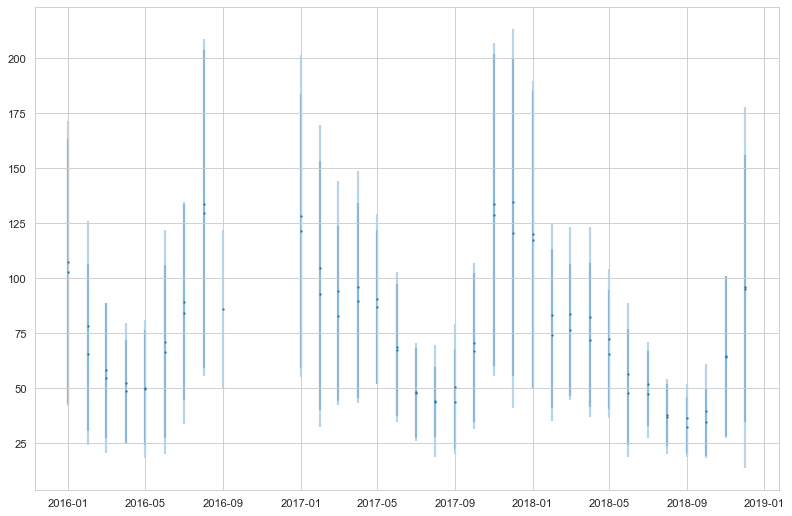

In [6]:
station = 'SFE'
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(x=baseline['date'],y=baseline[station]['mean'], s=1)
plt.errorbar(baseline['date'], baseline[station]['mean'], baseline[station]['std'], elinewidth=2, linestyle='None', zorder=-1, alpha=0.3)

In [7]:
def year_baseline_cont(df, year_range, station, weekday=1):
    
    plt.figure(figsize=(12, 8), dpi=80)

    for y in year_range:
        df_tmp = df.reset_index().loc[(df.reset_index().year==y) &
                                      (df.reset_index().weekday==weekday), [station,'date']].copy()
        plt.scatter(x=df_tmp['date'],y=df_tmp[station]['mean'], s=8)
        plt.errorbar(df_tmp['date'], df_tmp[station]['mean'], df_tmp[station]['std'], elinewidth=3, linestyle='None', zorder=-1, alpha=0.2)

In [6]:
def year_baseline_cont(df, year_range, station, weekday=1, save=False):
    
    fig,ax = plt.subplots(figsize=(12, 8))

    df_tmp = df.reset_index().loc[df.reset_index().weekday==weekday, [station,'date']].copy()
    plt.scatter(x=df_tmp['date'],y=df_tmp[station]['mean'], s=8, label='Promedio')
    plt.errorbar(df_tmp['date'], df_tmp[station]['mean'], 
                 df_tmp[station]['std'], elinewidth=3, linestyle='None', zorder=-1, alpha=0.2, label='Desviación estándar')
    
    plt.ylabel('$PM_{10}$ (μg/m³)', fontsize=12)
    plt.xlabel('Fecha', fontsize=12)
    
    lim_max = df_tmp[station]['mean'].max() + df_tmp[station]['std'].max() + 20
    plt.ylim([0, lim_max])

    #ax.set_xticklabels([])

    ax.legend()
    
    plt.title(f'Estación: {station} - Laboral: {weekday}')
    
    if save:

        plt.savefig(f'../output/figures/baseline/{station}_YearMothWeakDay_{weekday}_Baseline.png', bbox_inches='tight', dpi=150)
        
    plt.show()

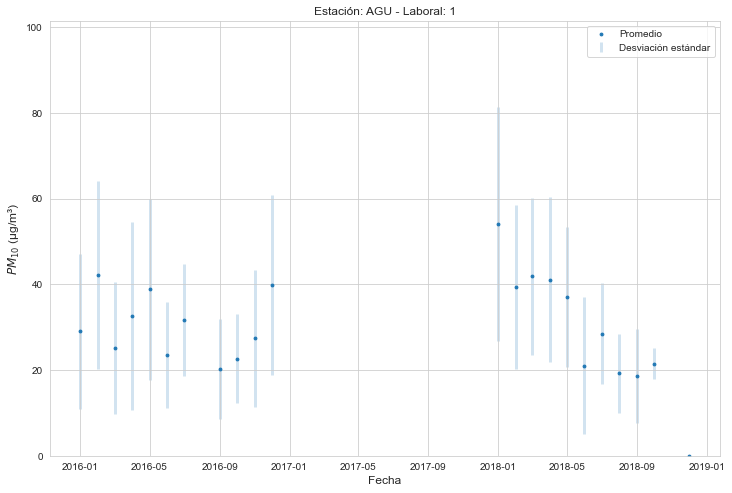

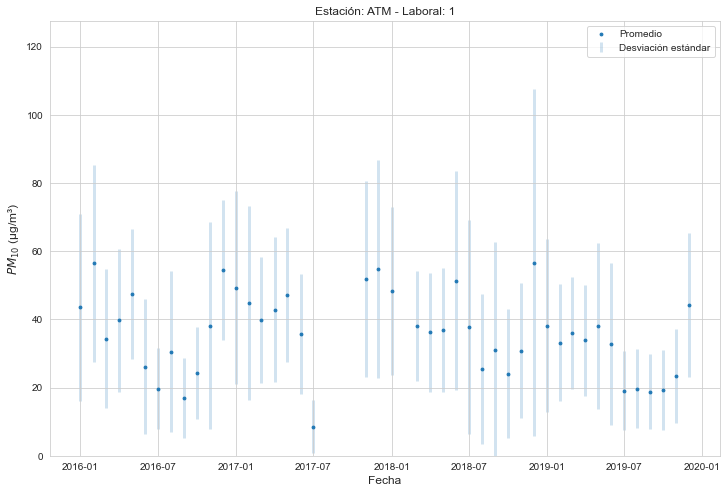

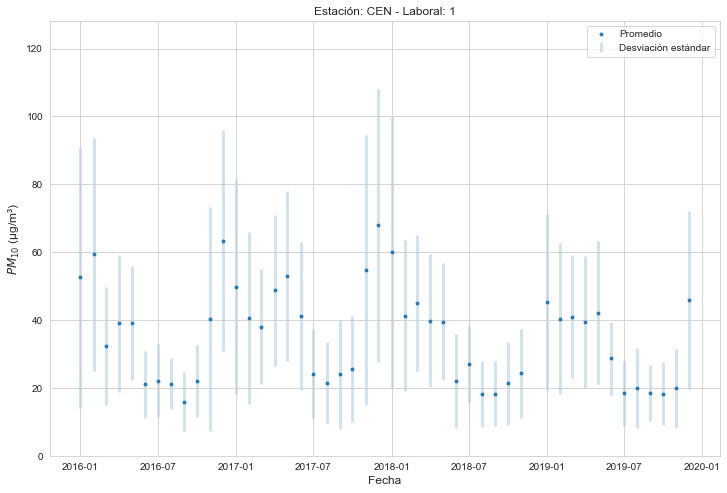

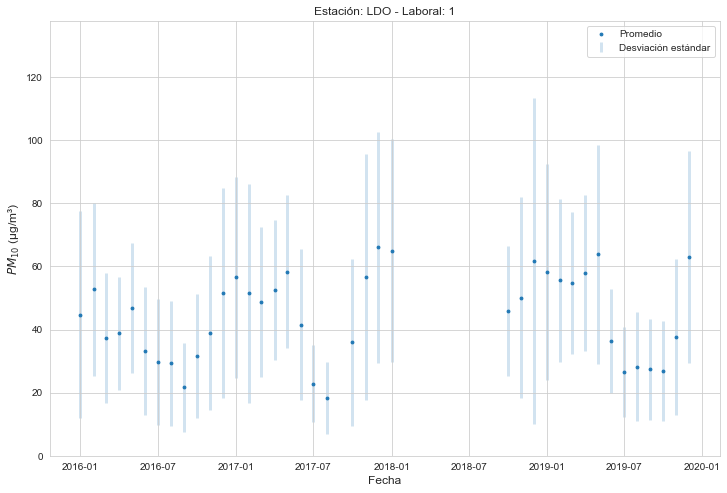

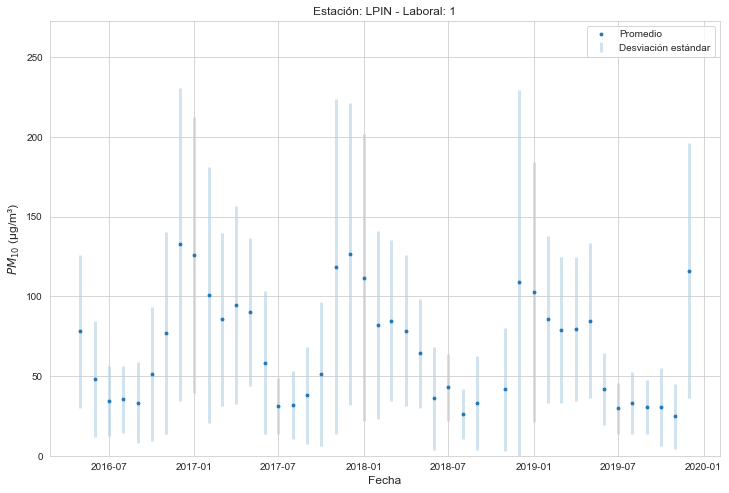

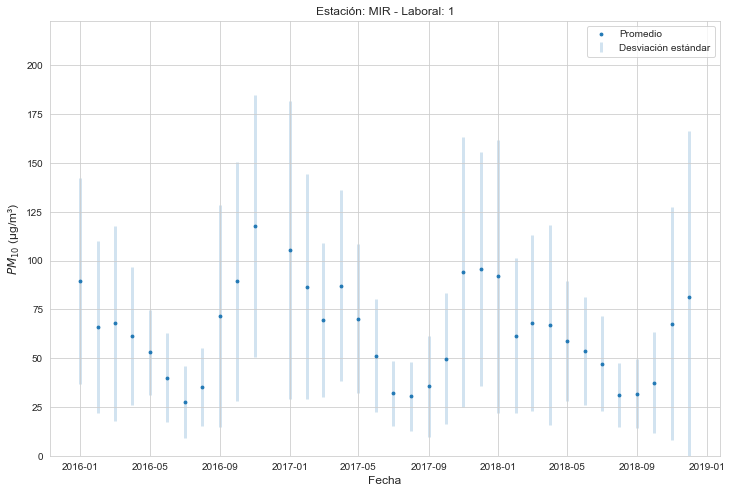

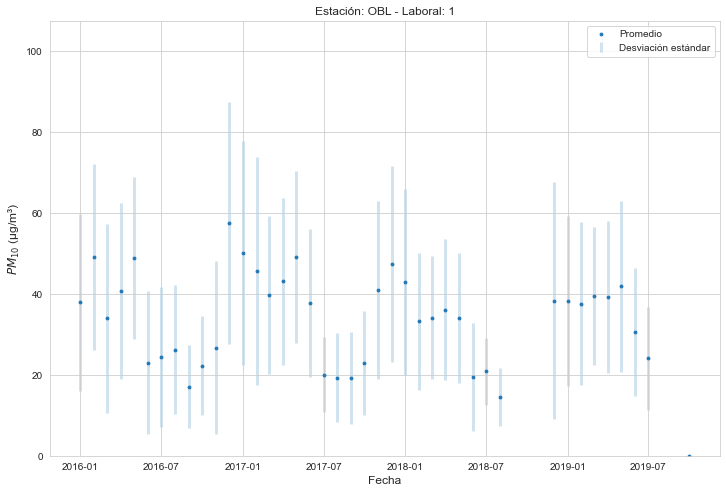

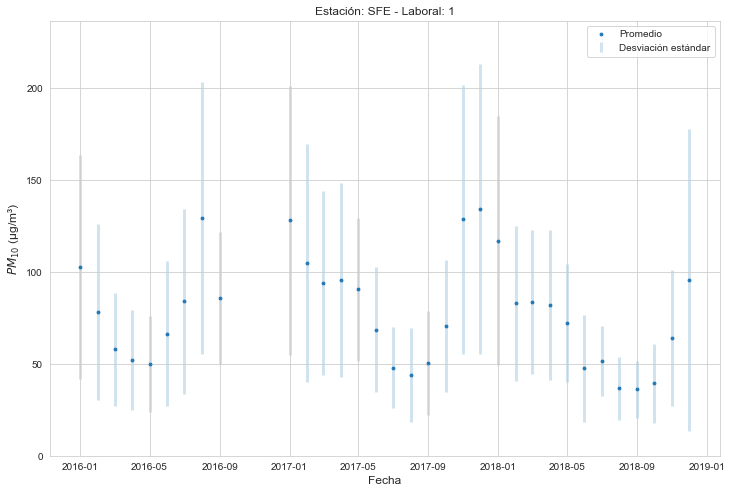

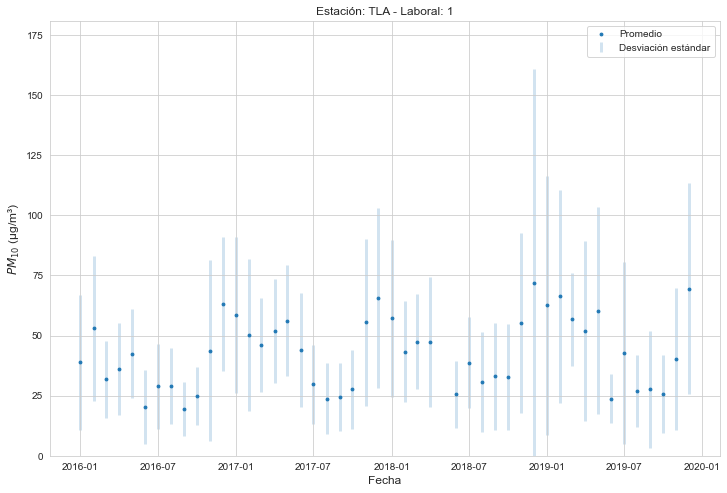

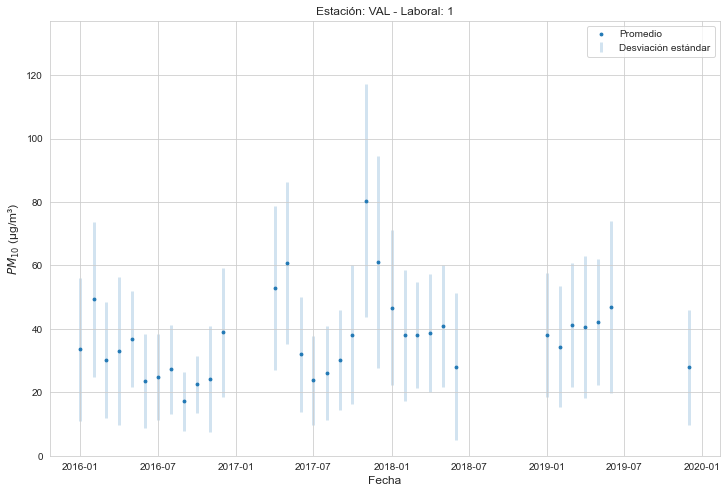

In [22]:
year_range = [2016,2017,2018,2019]
station = ['AGU','ATM','CEN','LDO','LPIN',
           'MIR','OBL','SFE','TLA','VAL']

for s in station:

    year_baseline_cont(baseline, year_range, s, weekday=1, save=True)

In [9]:
def year_baseline(df, year_range, station, weekday=1, save=False):
    
    fig,ax = plt.subplots(figsize=(12, 8))

    for y in year_range:
        df_tmp = df.reset_index().loc[(df.reset_index().year==y) &
                                      (df.reset_index().weekday==weekday), station].copy()
        plt.scatter(x=range(len(df_tmp)),y=df_tmp['mean'], s=8, label=f'Promedio - {y}')
        plt.errorbar(range(len(df_tmp)), df_tmp['mean'], df_tmp['std'], 
                     elinewidth=3, linestyle='None', zorder=-1, alpha=0.2)
        
        plt.ylabel('$PM_{10}$ (μg/m³)', fontsize=12)
        plt.xlabel('Mes', fontsize=12)

        #ax.set_xticklabels([])

        ax.legend()
        
    df_tmp = df.reset_index().loc[df.reset_index().weekday==weekday, [station,'date']].copy()
    lim_max = df_tmp[station]['mean'].max() + df_tmp[station]['std'].max() + 20
    plt.ylim([0, lim_max])
    
    
    ticklabels=['Ene','Feb','Mar','Abr','May','Jun','Jul',
                    'Ago','Sep','Oct','Nov','Dic']
    tickplace = [n for n in range(12)] #xaxis placement
    ax.set_xticks(tickplace)
    ax.set_xticklabels(ticklabels, fontsize=10) #add monthlabels to the xaxis

    plt.tick_params(axis='x',labelrotation=45)

    
    
    plt.title(f'Estación: {station} - Laboral: {weekday}')

    if save:
        plt.savefig(f'../output/figures/baseline/{station}_YearMothWeakDay_{weekday}_All_Baseline.png', bbox_inches='tight', dpi=150)
        
    plt.show()

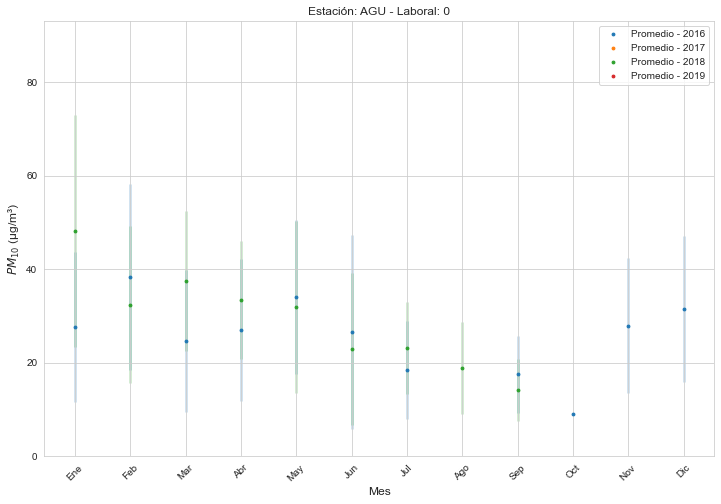

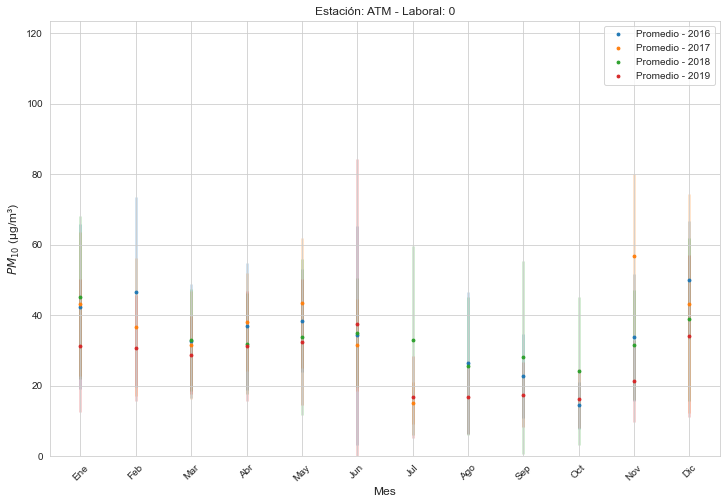

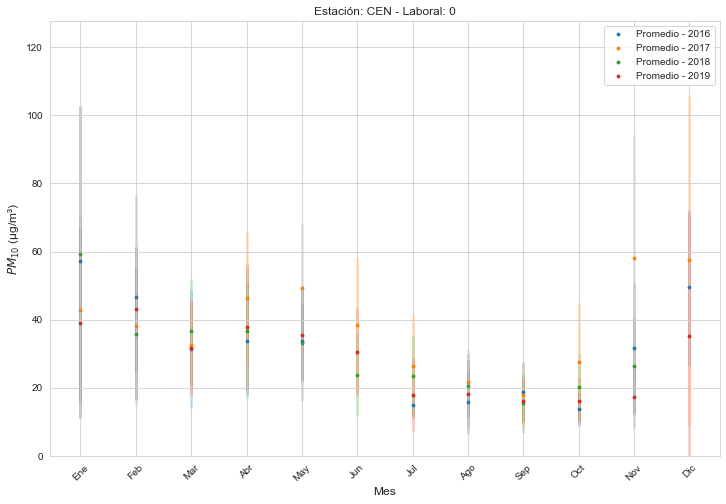

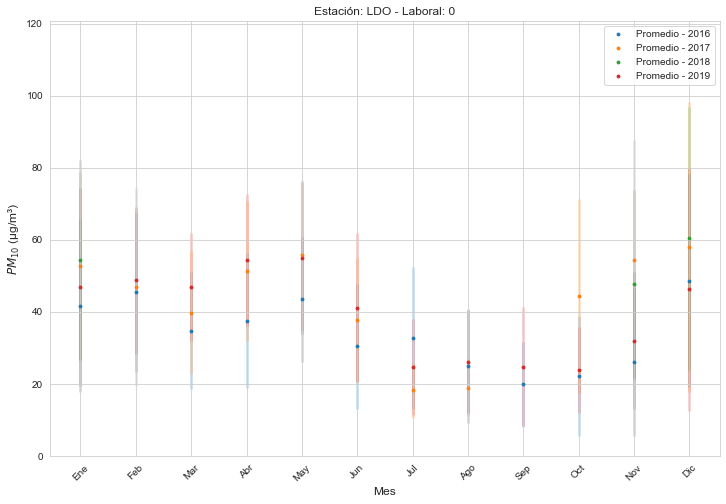

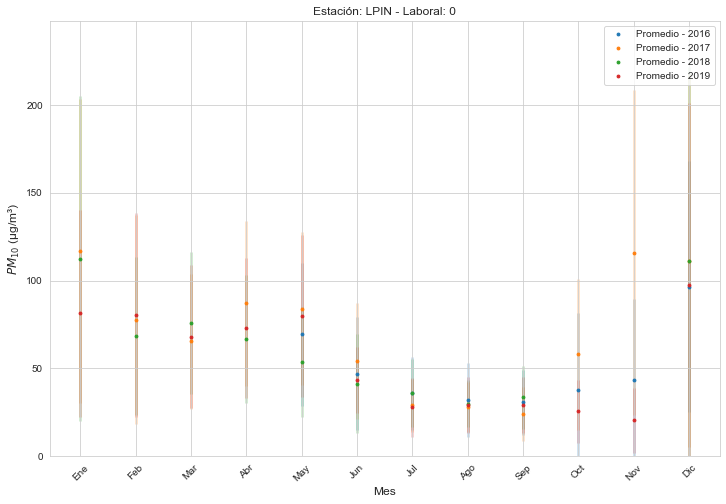

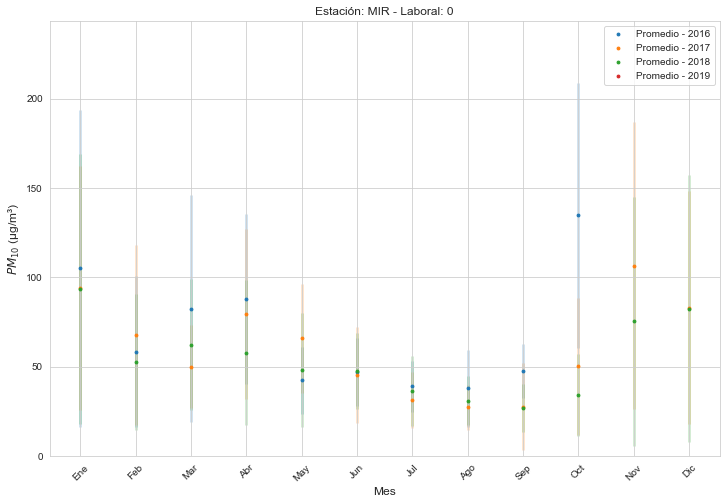

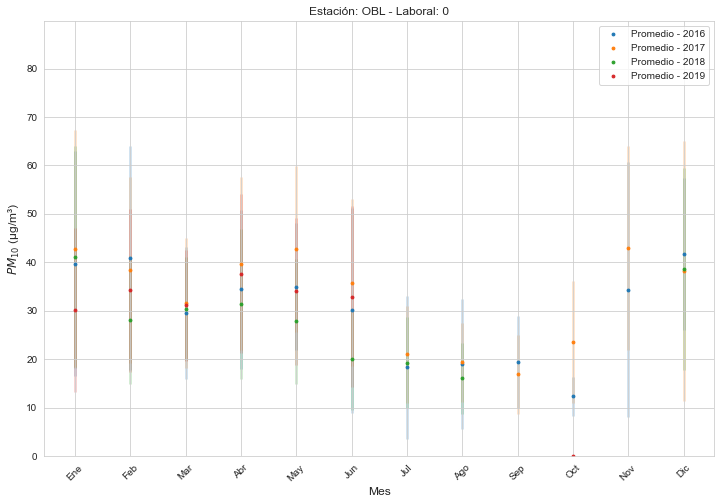

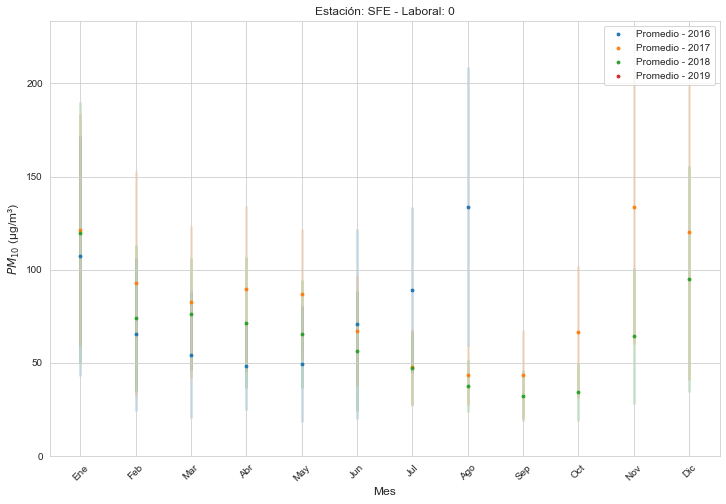

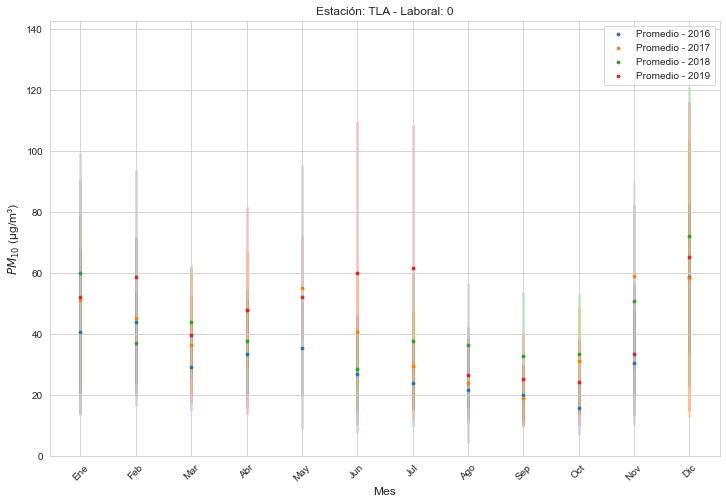

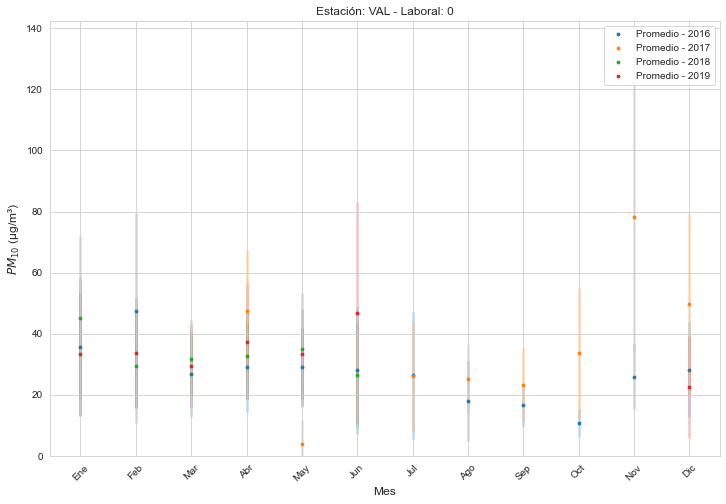

In [11]:
year_range = [2016,2017,2018,2019]
station = 'SFE'

station = ['AGU','ATM','CEN','LDO','LPIN',
           'MIR','OBL','SFE','TLA','VAL']

for s in station:
    year_baseline(baseline, year_range, s, weekday=0, save=True)